Número de linhas inicial: 7267
Nomes das colunas após renomeação:
['customerID', 'churn_original', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']

Valores ausentes por coluna (antes do tratamento):
Sem valores ausentes significativos antes do tratamento específico!

Sem duplicados!
Número de linhas após remover duplicados: 7267

Valores não convertidos para numérico em 'total_charges': 11
Número de linhas após remover NaN em 'total_charges': 7256

Coluna 'daily_charges' criada com sucesso!
   total_charges  tenure  daily_charges
0         593.30       9       2.197407
1         542.40       9       2.008889
2         280.85       4       2.340417
3        1237.85      13       3.173974
4         267.40       3       2.97111

<ipython-input-1-565c87032935>:168: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn_original', data=df_clientes, palette='coolwarm')


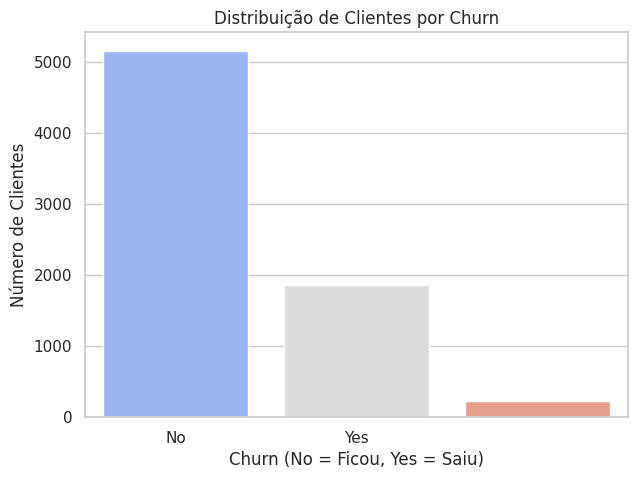

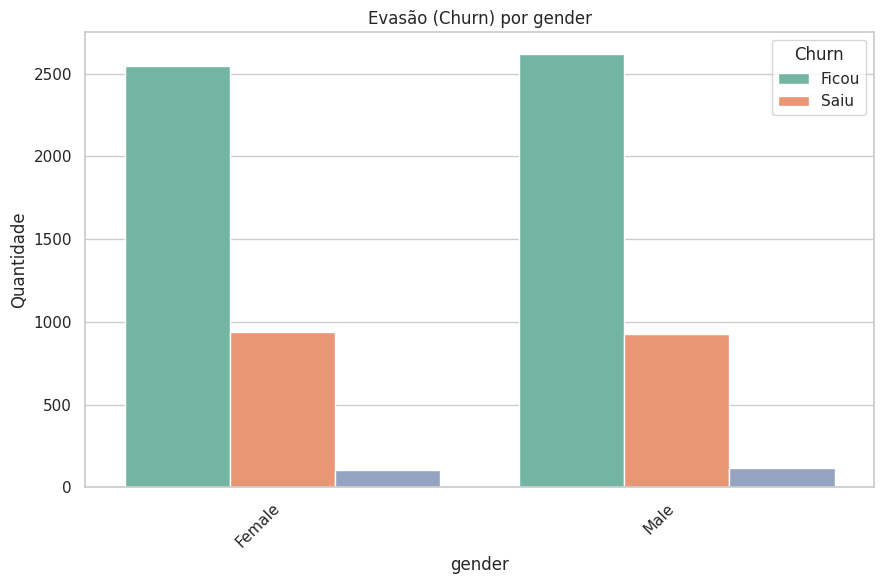

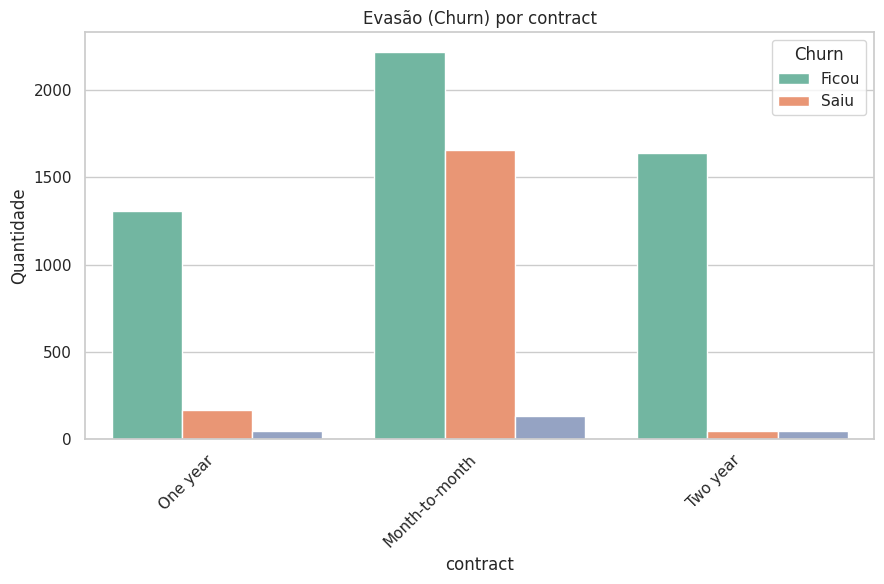

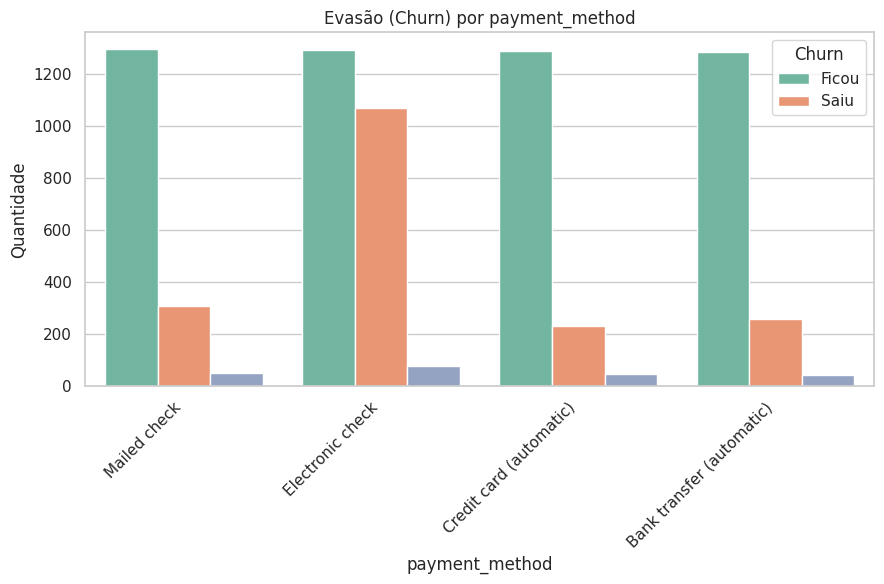

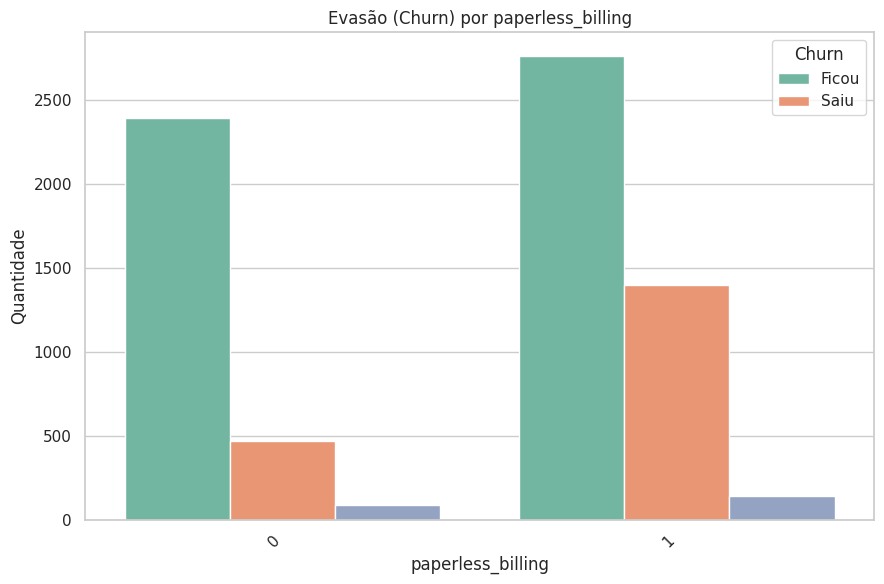

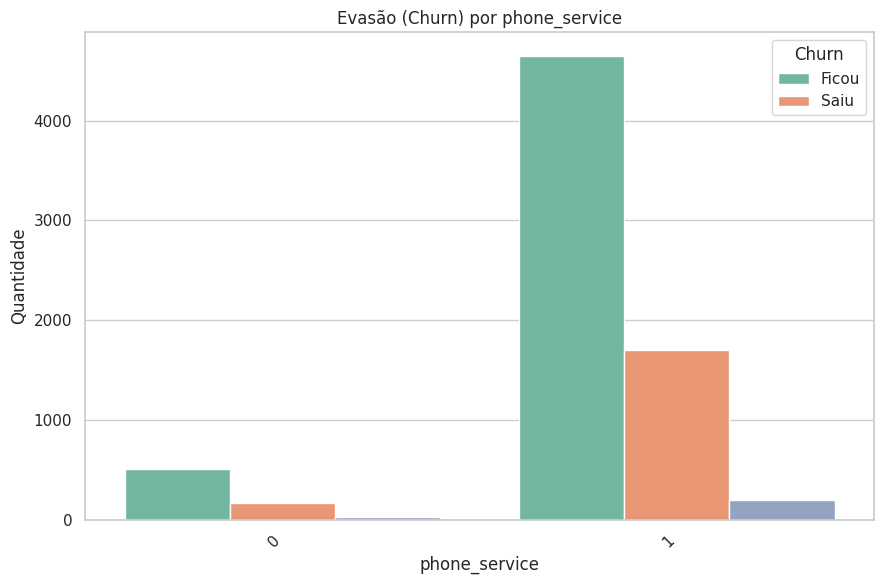

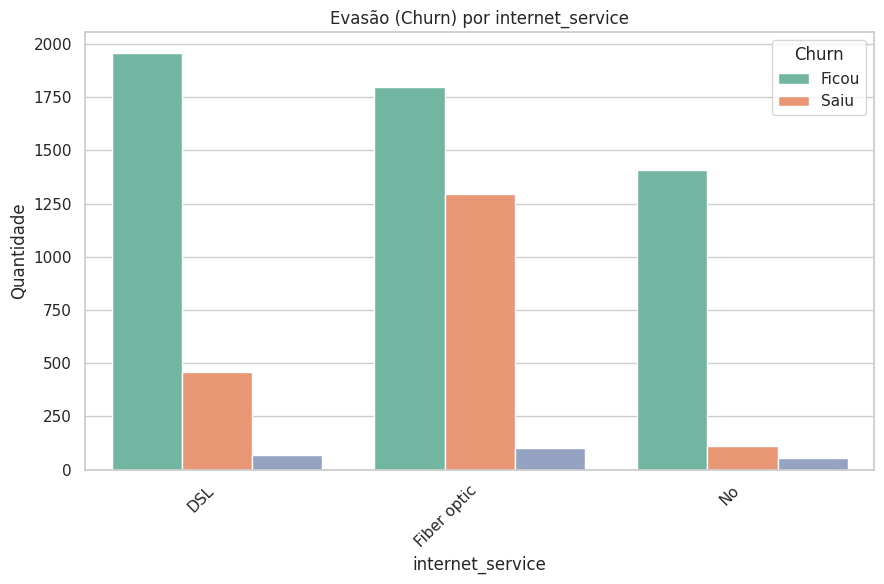

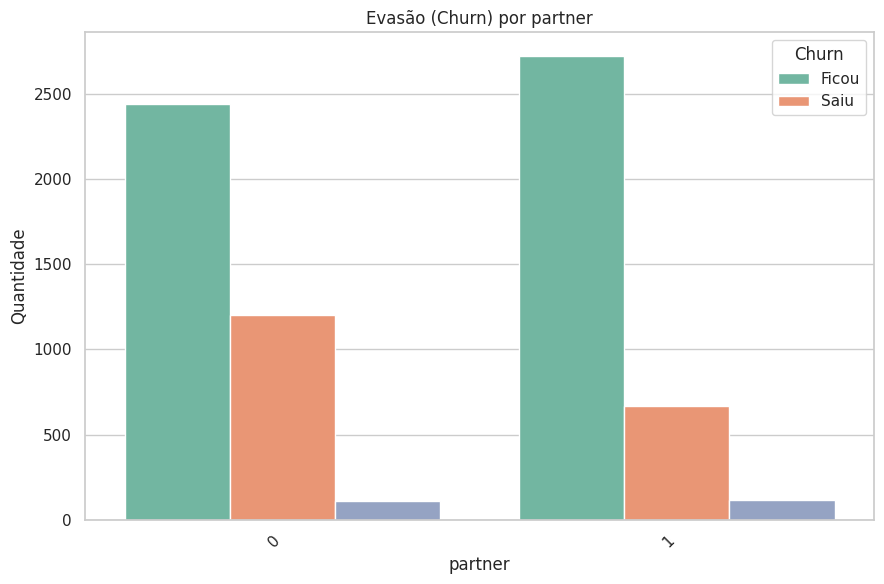

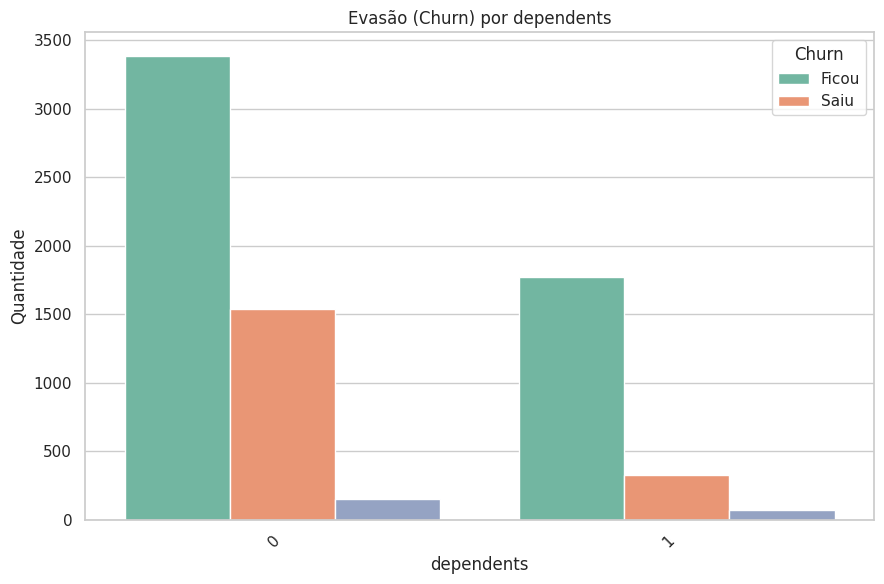

<ipython-input-1-565c87032935>:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn_bin', y=num, data=df_clientes, palette='pastel')


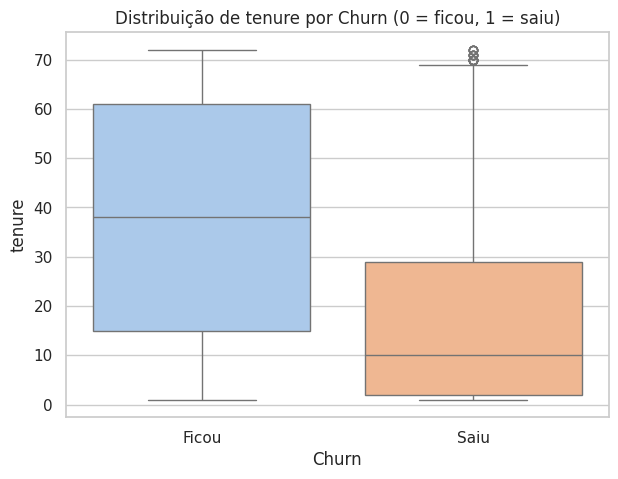

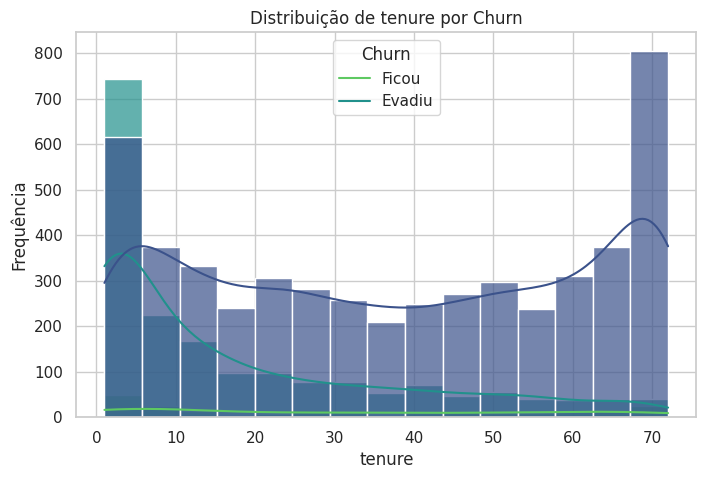

<ipython-input-1-565c87032935>:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn_bin', y=num, data=df_clientes, palette='pastel')


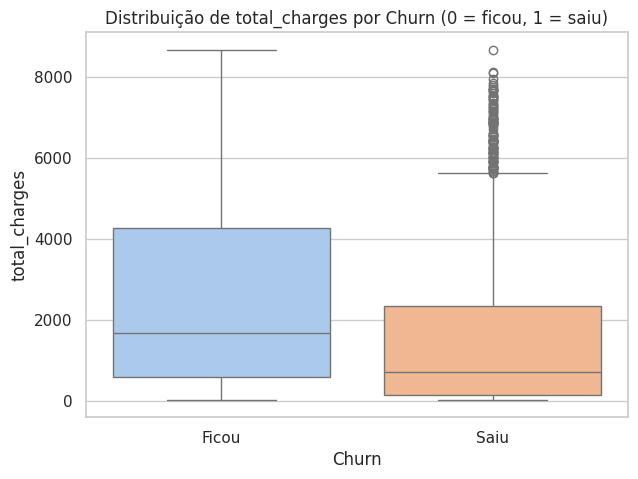

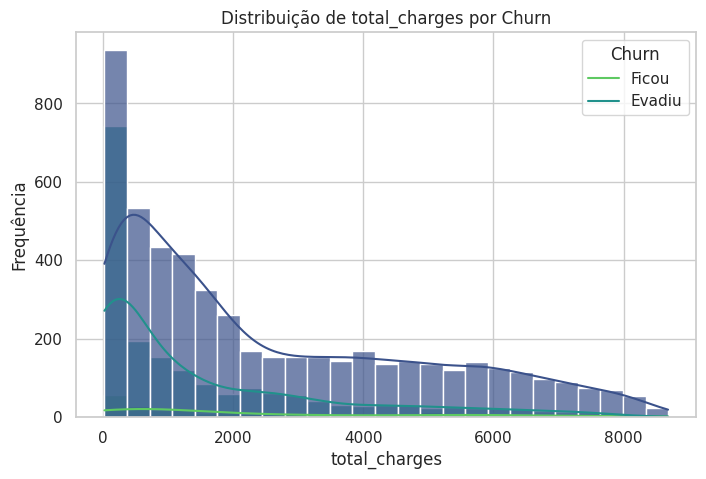

<ipython-input-1-565c87032935>:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn_bin', y=num, data=df_clientes, palette='pastel')


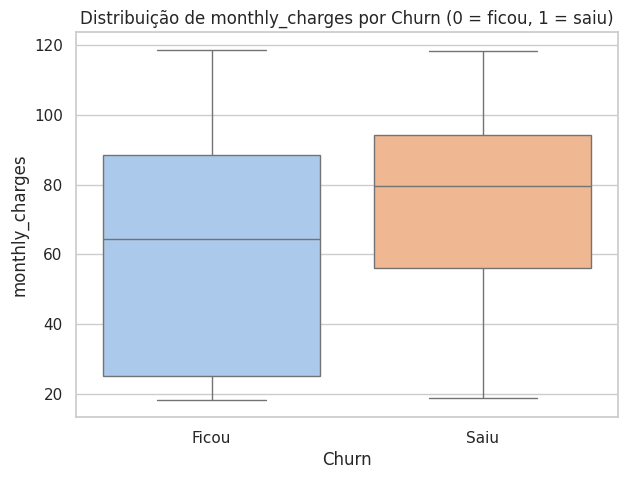

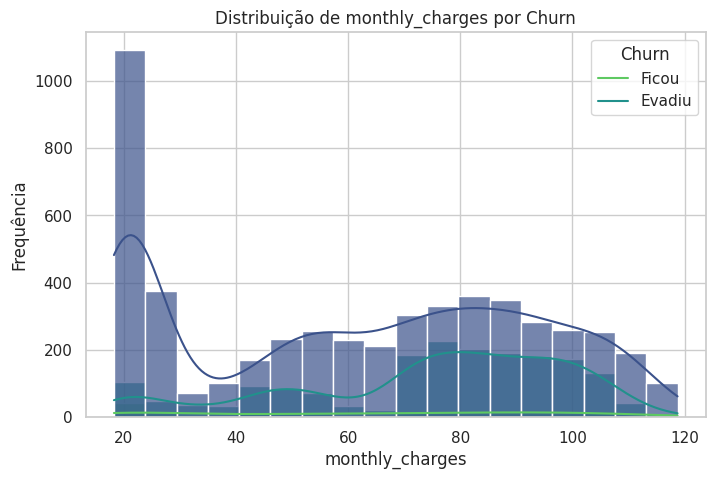

<ipython-input-1-565c87032935>:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn_bin', y=num, data=df_clientes, palette='pastel')


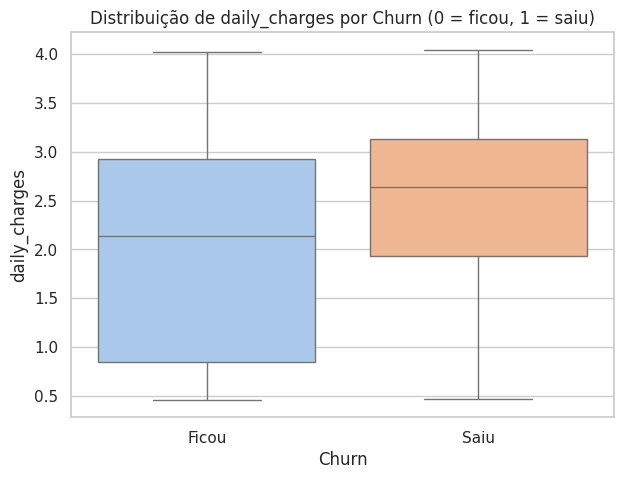

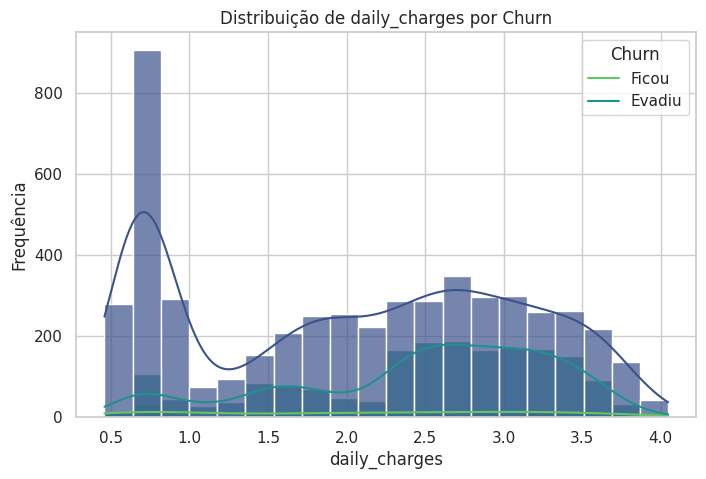


--- Análise de Correlação (Extra!) ---
Para dar um toque a mais na análise, vamos ver as correlações entre as variáveis numéricas e o churn.

Correlação das variáveis numéricas com 'churn_bin' (ordenado):
monthly_charges      0.192858
daily_charges        0.192033
paperless_billing    0.191454
senior_citizen       0.150541
streaming_tv         0.063254
streaming_movies     0.060860
multiple_lines       0.040033
phone_service        0.011691
device_protection   -0.066193
online_backup       -0.082307
partner             -0.149982
dependents          -0.163128
tech_support        -0.164716
online_security     -0.171270
total_charges       -0.199484
tenure              -0.354049
Name: churn_bin, dtype: float64


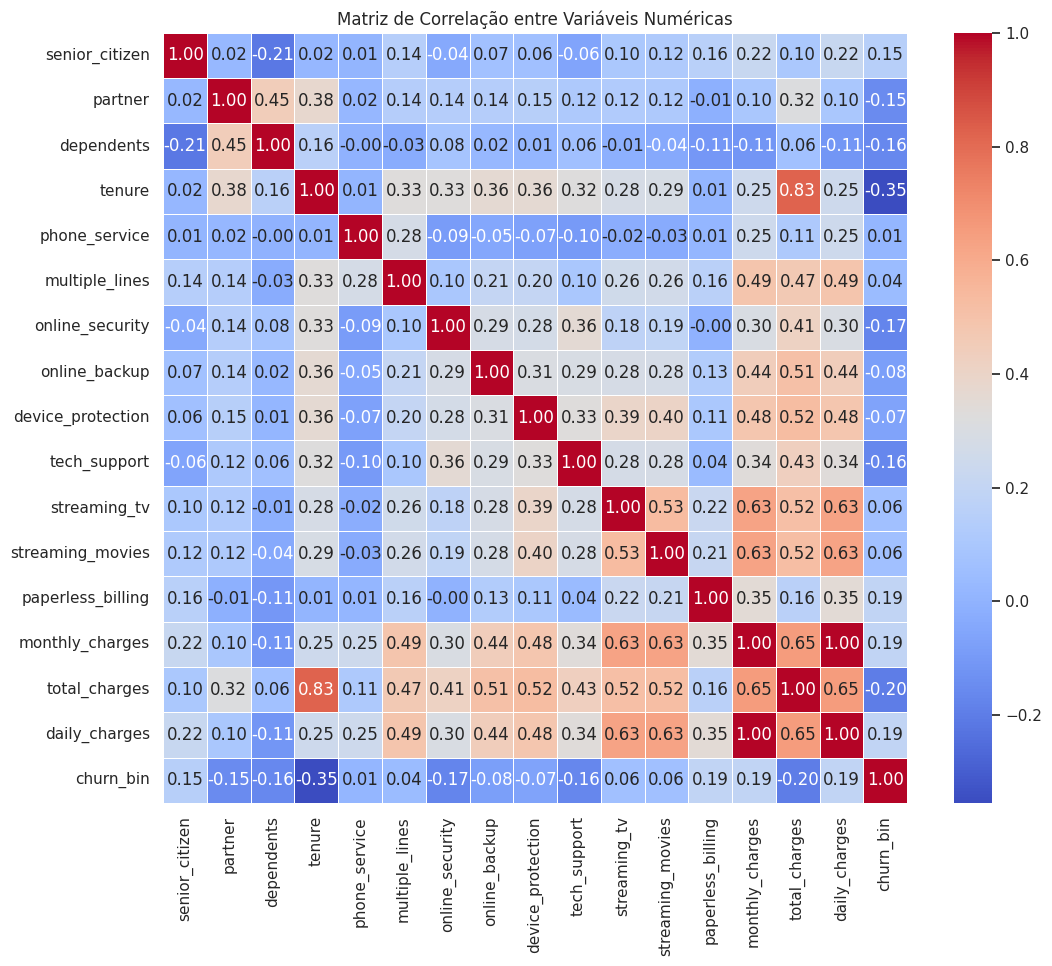

In [1]:
# TELECOM X - ANÁLISE DE EVASÃO DE CLIENTES
# Neste projeto, vamos analisar os dados da Telecom X para entender por que os clientes estão cancelando.

# Importando as bibliotecas que vamos usar
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o visual dos gráficos com seaborn
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

# Carregando os dados do GitHub
# Os dados foram carregados diretamente de um arquivo JSON hospedado no GitHub, utilizando a biblioteca `requests` para a requisição HTTP e
# `pandas` para a manipulação dos dados.
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
resposta = requests.get(url)
dados_json = resposta.json()

df = pd.DataFrame(dados_json)
print(f"Número de linhas inicial: {df.shape[0]}")

# Separando colunas aninhadas em colunas planas
df_clientes = df.copy()
colunas_dict = ['customer', 'phone', 'internet', 'account']

for col in colunas_dict:
    expandido = pd.json_normalize(df_clientes[col])
    # Renomeando as colunas expandidas para um formato mais amigável, removendo o prefixo e o ponto
    expandido.columns = [f"{col}_{sub.replace('.', '_')}" for sub in expandido.columns]
    df_clientes.drop(columns=[col], inplace=True)
    df_clientes = pd.concat([df_clientes, expandido], axis=1)

# Renomeação e Padronização de Colunas, para melhorar a legibilidade e facilitar a manipulação
# Criando um dicionário de mapeamento para renomear as colunas
novos_nomes_colunas = {
    'customer_customerID': 'customer_id',
    'customer_gender': 'gender',
    'customer_SeniorCitizen': 'senior_citizen',
    'customer_Partner': 'partner',
    'customer_Dependents': 'dependents',
    'customer_tenure': 'tenure', # Tempo de serviço/contrato
    'phone_PhoneService': 'phone_service',
    'phone_MultipleLines': 'multiple_lines',
    'internet_InternetService': 'internet_service',
    'internet_OnlineSecurity': 'online_security',
    'internet_OnlineBackup': 'online_backup',
    'internet_DeviceProtection': 'device_protection',
    'internet_TechSupport': 'tech_support',
    'internet_StreamingTV': 'streaming_tv',
    'internet_StreamingMovies': 'streaming_movies',
    'account_Contract': 'contract',
    'account_PaperlessBilling': 'paperless_billing',
    'account_PaymentMethod': 'payment_method',
    'account_Charges_Monthly': 'monthly_charges', # Corrigido o nome após a normalização
    'account_Charges_Total': 'total_charges',   # Corrigido o nome após a normalização
    'Churn': 'churn_original' # Mantemos o nome original do churn para referência
}

df_clientes.rename(columns=novos_nomes_colunas, inplace=True)

print("Nomes das colunas após renomeação:")
print(df_clientes.columns.tolist())


#Verificação e Remoção de Dados Ausentes e Duplicados

# Realizamos uma verificação de valores ausentes em todas as colunas. Para a coluna `total_charges`, que continha alguns valores não numéricos (espaços vazios),
# convertemos esses valores para `NaN` e, em seguida, removemos as linhas correspondentes, por serem dados críticos e difíceis de imputar sem perda de informação.
# Além disso, verificamos e removemos quaisquer linhas duplicadas para garantir a unicidade dos registros.

print("\nValores ausentes por coluna (antes do tratamento):")
valores_nulos = df_clientes.isnull().sum()
valores_com_nulos = valores_nulos[valores_nulos > 0]

if not valores_com_nulos.empty:
    print(valores_com_nulos)
else:
    print("Sem valores ausentes significativos antes do tratamento específico!")

# Removendo duplicados
num_duplicados = df_clientes.duplicated().sum()
if num_duplicados > 0:
    print(f"\nForam removidas {num_duplicados} linhas duplicadas.")
    df_clientes.drop_duplicates(inplace=True)
else:
    print("\nSem duplicados!")
print(f"Número de linhas após remover duplicados: {df_clientes.shape[0]}")


# Corrigindo tipo da coluna 'total_charges' para numérico
df_clientes['total_charges'] = pd.to_numeric(df_clientes['total_charges'], errors='coerce')

# Contando valores não convertidos (NaN) após conversão em 'total_charges'
num_nulos_total_charges = df_clientes['total_charges'].isnull().sum()
print(f"\nValores não convertidos para numérico em 'total_charges': {num_nulos_total_charges}")

# Removendo linhas com NaN em 'total_charges'
df_clientes = df_clientes.dropna(subset=['total_charges']).copy()
print(f"Número de linhas após remover NaN em 'total_charges': {df_clientes.shape[0]}")


# Criação de Novas Variáveis e Binarização

# Criamos a coluna `daily_charges` para representar o custo diário médio do cliente ao longo do seu tempo de contrato,
# dividindo o `total_charges` pelo `tenure` (tempo em meses) multiplicado por 30 dias.
# Além disso, a coluna `churn_original` (que contém 'Yes' ou 'No') foi binarizada para `churn_bin` (1 para 'Yes', 0 para 'No'),
# o que facilita análises quantitativas e modelagem. Outras colunas binárias (`partner`, `phone_service`, etc.) também foram mapeadas para 0 e 1.

# Criando a coluna 'daily_charges'
df_clientes['daily_charges'] = df_clientes.apply(
    lambda row: row['total_charges'] / (row['tenure'] * 30) if row['tenure'] > 0 else 0,
    axis=1
)
print("\nColuna 'daily_charges' criada com sucesso!")
print(df_clientes[['total_charges', 'tenure', 'daily_charges']].head())

# Transformar coluna 'churn_original' de Yes/No para binário 1/0 e criar 'churn_bin'
df_clientes['churn_bin'] = df_clientes['churn_original'].map({'Yes': 1, 'No': 0})

# Tratamento de valores não-binários para 0/1 em outras colunas
colunas_para_binarizar = [
    'partner', 'dependents', 'phone_service', 'multiple_lines',
    'online_security', 'online_backup', 'device_protection', 'tech_support',
    'streaming_tv', 'streaming_movies', 'paperless_billing'
]

for col in colunas_para_binarizar:
    if col in df_clientes.columns:
        df_clientes[col] = df_clientes[col].astype(str).str.lower().map({
            'yes': 1,
            'no': 0,
            'no internet service': 0,
            'no phone service': 0
        }).fillna(0) # Preenche com 0 qualquer valor que não se encaixe
        df_clientes[col] = df_clientes[col].astype(int) # Converte para inteiro
        print(f"Coluna '{col}' convertida para 0 e 1. Valores únicos: {df_clientes[col].unique()}")


# 3. Análise Exploratória de Dados (EDA)

# Analisamos as estatísticas básicas das variáveis numéricas para entender sua distribuição.

print("\n--- Análise descritiva das variáveis numéricas (após tratamento): ---")
print(df_clientes.describe())

# Churn por Variáveis Numéricas

# Avaliamos a média, mediana e desvio padrão de variáveis como tempo de contrato (`tenure`) e gasto total (`total_charges`), segmentadas por status de Churn.

print("\n--- Média, mediana e desvio padrão de 'tenure' e 'total_charges' por churn: ---")

for col in ['tenure', 'total_charges']:
    print(f"\nVariável: {col}")
    print(df_clientes.groupby('churn_original')[col].agg(['mean', 'median', 'std']))

# Proporção Geral de Churn

# A proporção de clientes que cancelaram é um indicador crucial.

prop_churn = df_clientes['churn_original'].value_counts(normalize=True) * 100
print("\n--- Proporção de clientes que cancelaram (Churn=Yes) e permaneceram (Churn=No): ---")
print(prop_churn)

plt.figure(figsize=(7, 5))
sns.countplot(x='churn_original', data=df_clientes, palette='coolwarm')
plt.title('Distribuição de Clientes por Churn')
plt.xlabel('Churn (No = Ficou, Yes = Saiu)')
plt.ylabel('Número de Clientes')
plt.show()

# Churn por Variáveis Categóricas

# Exploramos como variáveis categóricas como gênero, tipo de contrato e método de pagamento influenciam a taxa de evasão.

categoricas = ['gender', 'contract', 'payment_method', 'paperless_billing',
               'phone_service', 'internet_service', 'partner', 'dependents']

for cat in categoricas:
    if cat in df_clientes.columns:
        plt.figure(figsize=(9, 6))
        sns.countplot(x=cat, hue='churn_original', data=df_clientes, palette='Set2')
        plt.title(f'Evasão (Churn) por {cat}')
        plt.xlabel(cat)
        plt.ylabel('Quantidade')
        plt.legend(title='Churn', labels=['Ficou', 'Saiu'])
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Churn por Variáveis Numéricas (Boxplots e Histogramas)

# As distribuições de variáveis numéricas como `tenure`, `total_charges`, `monthly_charges` e `daily_charges`
# foram analisadas usando boxplots e histogramas, comparando clientes com e sem churn.

numericas = ['tenure', 'total_charges', 'monthly_charges', 'daily_charges']

for num in numericas:
    if num in df_clientes.columns:
        plt.figure(figsize=(7, 5))
        sns.boxplot(x='churn_bin', y=num, data=df_clientes, palette='pastel')
        plt.title(f'Distribuição de {num} por Churn (0 = ficou, 1 = saiu)')
        plt.xlabel('Churn')
        plt.ylabel(num)
        plt.xticks(ticks=[0, 1], labels=['Ficou', 'Saiu'])
        plt.show()

        plt.figure(figsize=(8, 5))
        sns.histplot(data=df_clientes, x=num, hue='churn_original', kde=True, palette='viridis', alpha=0.7)
        plt.title(f'Distribuição de {num} por Churn')
        plt.xlabel(num)
        plt.ylabel('Frequência')
        plt.legend(title='Churn', labels=['Ficou', 'Evadiu'])
        plt.show()

# Análise de Correlação

# Uma matriz de correlação foi gerada para entender as relações entre as variáveis numéricas e a variável de churn.

print("\n--- Análise de Correlação (Extra!) ---")
print("Para dar um toque a mais na análise, vamos ver as correlações entre as variáveis numéricas e o churn.")

df_numerico = df_clientes.select_dtypes(include=[np.number])

matriz_correlacao = df_numerico.corr()
print("\nCorrelação das variáveis numéricas com 'churn_bin' (ordenado):")
print(matriz_correlacao['churn_bin'].sort_values(ascending=False).drop('churn_bin', errors='ignore'))

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Principais Conclusões

# Alguns pontos se destacaram durante o estudo:
# • Clientes com pouco tempo de contrato (tenure curto) tendem a evadir com mais frequência.
# • Planos com cobrança mensal estão diretamente ligados a altas taxas de churn.
# • O método de pagamento “Electronic check” tem forte correlação com evasão.
# • A adesão a serviços adicionais (como backup e suporte técnico) parece ajudar na retenção.
# • Curiosamente, clientes com Fibra Óptica apresentaram maior taxa de churn — o que pode indicar uma falha na entrega ou expectativas não atendidas.

# ## 5. Recomendações

# Com base nas análises, algumas sugestões surgem:
# • Criar programas de boas-vindas focados nos clientes novos (especialmente no início do ciclo).
# • Incentivar contratos de longo prazo.
# • Investigar o motivo da insatisfação com o método de pagamento “Electronic check”.
# • Promover serviços adicionais como parte de pacotes mais completos.
# • Reavaliar a qualidade do serviço de fibra óptica, que pode estar impactando negativamente a experiência do cliente..

# Essas recomendações visam não apenas reduzir a taxa de churn, mas também melhorar a satisfação geral do cliente e fortalecer o relacionamento com a Telecom X.